In [1]:
import os
print(os.getcwd())

C:\Users\장세환


In [2]:
os.chdir("C:/Users/장세환/Desktop/시계열/코로나_해외유입환자모델링/corona_contest_data_0406")
print(os.getcwd)

<built-in function getcwd>


In [3]:
print(os.getcwd())

C:\Users\장세환\Desktop\시계열\코로나_해외유입환자모델링\corona_contest_data_0406


In [9]:
import tensorflow as tf
import sklearn 
import matplotlib as mpl
from fbprophet import Prophet
# General Library

import numpy as np
import pandas as pd
import time
import datetime
import random
import os
import csv
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Library
from fbprophet import Prophet
import lightgbm as lgb
from sklearn.model_selection import train_test_split

### 로밍 데이터
return: 로밍 여행자가 한국에 귀국한 날짜(ex)20200128 )
iso: 2자리 국가코드(ex)cn )
arrival: iso국가에 도착한 날짜(ex)20200123 )
departure: iso 국가에 떠난 날짜(ex) 20200128)
count: 고객 수(return 일자에 귀국한 로밍 고객 중 iso국가에 arrival에 도착해서 departure에 떠난 고객 수) (ex) 161)
### 감염병 데이터
- 파일명 : 파일리스트의 파일명과 일치
- 제목 : 기사 제목
- URL : 원문 링크
- 수집 일자 : KT 크롤링 시스템에 의해 기사가 수집된 날짜
- 게시 일자 : 원문 Site에 해당 기사가 게시된 날짜
- 채널명 : 기사가 게시된 Site의 이름
- 감염병명 : 기사에 표기된 감염병의 이름
- 분류명 : 감염병의 분류(카테고리) 명

In [8]:
roaming_df1=pd.read_csv('C:/Users/장세환/Desktop/시계열/코로나_해외유입환자모델링/corona_contest_data_0406/2. Roaming_data1.csv')
news_df=pd.read_csv('C:/Users/장세환/Desktop/시계열/코로나_해외유입환자모델링/corona_contest_data_0406/NewsList.csv')
patient_df=pd.read_excel('C:/Users/장세환/Desktop/시계열/코로나_해외유입환자모델링/corona_contest_data_0406/corona_dataset.xlsx')
patient_df_new=pd.read_excel('C:/Users/장세환/Desktop/시계열/코로나_해외유입환자모델링/corona_contest_data_0406/corona_dataset_508.xlsx')
Time_our=pd.read_csv('C:/Users/장세환/Desktop/시계열/코로나_해외유입환자모델링/corona_contest_data_0406/Time.csv')
p=pd.read_excel('C:/Users/장세환/Desktop/시계열/코로나_해외유입환자모델링/corona_contest_data_0406/corona_dataset_509.xlsx')



In [7]:
roaming_df1.head()

,return,iso,arrival,departure,count
0,20200131,ad,20200130,20200130,3
1,20200131,ae,20191231,20200125,3
2,20200131,ae,20191231,20200131,3
3,20200131,ae,20200102,20200102,3
4,20200131,ae,20200104,20200131,3


In [7]:
plt.plot(roaming_df['count'])

NameError: name 'roaming_df' is not defined

In [ ]:
roaming_df[['iso', 'count']].groupby(['iso'], as_index=False).sum().sort_values(by='count', ascending = False)

In [ ]:
# 가설1: 우리나라보다 감염자가 많은 국가에서 유입될것이다
# 일별 해외유입환자수 데이터 필요
# 

In [ ]:
roaming_df['return'] = roaming_df['return'].apply(lambda x:pd.to_datetime(str(x), format='%Y%m%d'))
roaming_df['return_year'] = roaming_df['return'].apply(lambda x : x.year)
roaming_df['return_month'] = roaming_df['return'].apply(lambda x : x.month)
roaming_df['return_day'] = roaming_df['return'].apply(lambda x : x.day)

# 환자수 사용

In [116]:
patient_df.head()

,ds,y,ch,asia,europe,us,africa,austrailia
0,2020-01-20,1,1,0,0,0,0,0
1,2020-01-24,1,1,0,0,0,0,0
2,2020-01-26,1,1,0,0,0,0,0
3,2020-01-27,1,1,0,0,0,0,0
4,2020-01-30,1,1,0,0,0,0,0


In [117]:
y=patient_df['y']# prophet에 넣기 위해 변경
ds=patient_df['ds']
df=pd.concat([ds,y],axis=1)
df.head()#다변량으로 넣어도 유의미할지 잘모르겠음

,ds,y
0,2020-01-20,1
1,2020-01-24,1
2,2020-01-26,1
3,2020-01-27,1
4,2020-01-30,1


In [118]:
df['ds']=pd.to_datetime(df['ds'])

In [119]:
#uni_data.plot(subplots=True)

In [120]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [121]:
future = m.make_future_dataframe(periods=14)
future.tail()

,ds
104,2020-05-13
105,2020-05-14
106,2020-05-15
107,2020-05-16
108,2020-05-17


In [122]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
104,2020-05-13,21.586999,6.941384,35.583914
105,2020-05-14,19.826157,5.921299,33.768639
106,2020-05-15,18.061108,3.423341,32.758760
107,2020-05-16,17.788243,3.254340,31.027081
108,2020-05-17,21.480915,7.555174,35.284405


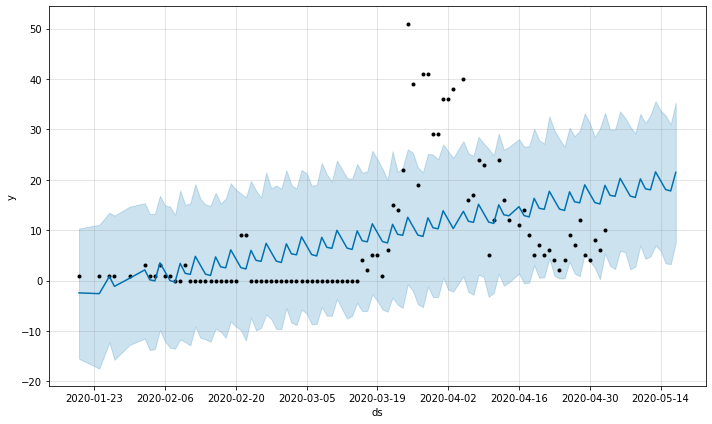

In [123]:
fig1 = m.plot(forecast)

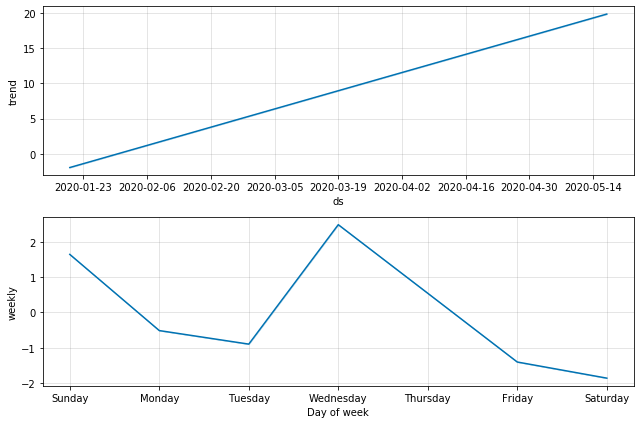

In [16]:
fig2 = m.plot_components(forecast)

In [17]:
df['y'].astype(float)
uni_data = df['y']
uni_data.index = df['ds']
uni_data.head()

ds
2020-01-20    1
2020-01-24    1
2020-01-26    1
2020-01-27    1
2020-01-30    1
Name: y, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000281A923C9C8>],
      dtype=object)

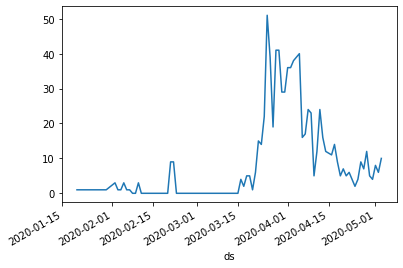

In [18]:
uni_data.plot(subplots=True)# 3/22 을 기점으로 확 뛰는 모습을 보인다.

3/22 을 기점으로 확 뛰는 모습을 보인다.
1. 3/22을 기준으로 데이터를 나눠서 피팅해서 확인해 보기
2. 기사크롤링, 로밍데이터에서 3/22에 어떤 사건이나 경향성이 바뀐것이 있는지 확인해보기->해주세용


In [19]:
# 1번
df1=df[55:]
df1.head()

,ds,y
55,2020-03-23,14
56,2020-03-24,22
57,2020-03-25,51
58,2020-03-26,39
59,2020-03-27,19


In [124]:
m = Prophet()
m.fit(df1)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [125]:
future = m.make_future_dataframe(periods=18)
future.tail()

,ds
53,2020-05-17
54,2020-05-18
55,2020-05-19
56,2020-05-20
57,2020-05-21


In [23]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
53,2020-05-17,-5.895254,-14.944680,2.947600
54,2020-05-18,-18.711474,-28.240767,-9.006333
55,2020-05-19,-17.368573,-26.591948,-8.198918
56,2020-05-20,-9.689820,-18.809474,-0.953735
57,2020-05-21,-14.011219,-22.633109,-4.316568


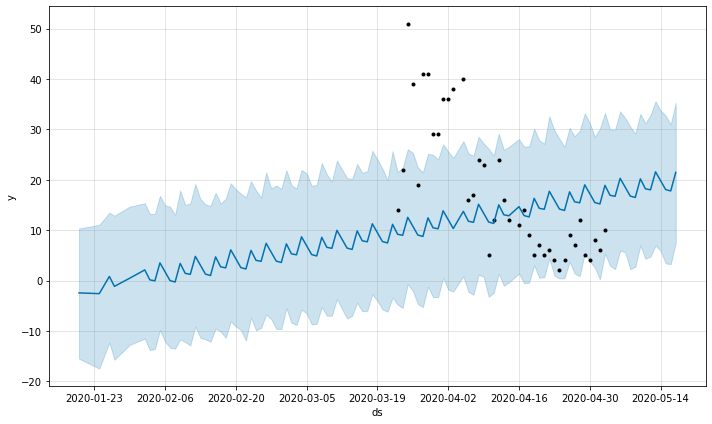

In [126]:
fig1 = m.plot(forecast)

In [127]:
# 최근 트렌드를 더 반영하기 위하여 앞부분만 다시 피팅
df2=df[80:]
df2.head()

,ds,y
80,2020-04-19,5
81,2020-04-20,7
82,2020-04-21,5
83,2020-04-22,6
84,2020-04-23,4


In [128]:
m = Prophet()
m.fit(df2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


In [129]:
future = m.make_future_dataframe(periods=20)
future.tail()

,ds
30,2020-05-19
31,2020-05-20
32,2020-05-21
33,2020-05-22
34,2020-05-23


In [130]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
30,2020-05-19,16.901772,15.084441,18.719460
31,2020-05-20,13.885511,11.962855,15.728029
32,2020-05-21,12.377389,10.679489,14.166025
33,2020-05-22,13.382836,11.524276,15.175648
34,2020-05-23,13.382849,11.694754,15.164299


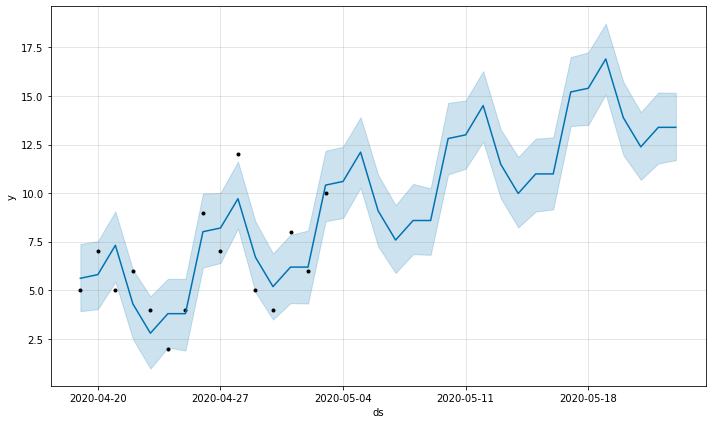

In [131]:
fig2 = m.plot(forecast)

최신 데이터 위주로 더 짧게 추정하니 조금 더 그럴 듯 해지기 시작했다.
그렇다면 관건은 미래(5월6~19일)의 트렌드를 가장 잘 담을 수 있는 구간이 언제부터인가 고민하는것이다.
또한 데이터가 적어 오버피팅의 우려가 있고 예상하지 못하는 사건(ex) 입국자 격리제한 해제 및 입국 자유 등)이 예상구간에 발생한다면 잡아내기 힘들 것으로 보인다.
<생각해볼 점>
1. 과거의 해외환자유입수가 현재의 해외환자유입수에 얼마나 영향을 미치는가?
2. 언제까지의 트렌드가 미래의 트렌드에 영향을 미치는가
3. 과거의 트렌드까지 반영해주는 것보다 현재와 가까운 트렌드 위주로 반영해주는것이 더 잘 예측할 수도 있겠다!->lstm보다 rnn이 나을수도 있다.
-> 반복해서 구간별로 잘라서 예측해보자
->2주단위를 잘 예측할 수 있는 데이터 구간을 찾자! (lgbmregressor, mlpregressor)

In [ ]:
fig2 = m.plot_components(forecast)

# 최적의 x,y 를 찾자 ->grid search
df2=df[x:]
future = m.make_future_dataframe(periods=y)
forecast = m.predict(future)
fig = m.plot(forecast)

데이터를 구간을 나눠서 x,y 를 따로따로 학습시켜보자

In [ ]:
len(df)

In [30]:
df_1=df[:15]
df_2=df[15:30]
df_3=df[30:45]
df_4=df[45:60]
df_5=df[60:75]
df_6=df[75:]

In [ ]:
m_1 = Prophet()
m_1.fit(df_1)
future_1 = m_1.make_future_dataframe(periods=10)
forecast_1 = m_1.predict(future_1)
fig_1 = m_1.plot(forecast_1)
uni_data.plot(subplots=True)

In [ ]:
m_1 = Prophet()
m_1.fit(df_1)
future_1 = m_1.make_future_dataframe(periods=15)
forecast_1 = m_1.predict(future_1)
fig_1 = m_1.plot(forecast_1)
uni_data.plot(subplots=True)

In [ ]:
m_1 = Prophet()
m_1.fit(df_1)
future_1 = m_1.make_future_dataframe(periods=20)
forecast_1 = m_1.predict(future_1)
fig_1 = m_1.plot(forecast_1)
uni_data.plot(subplots=True)

In [ ]:
m_2 = Prophet()
m_2.fit(df_2)
future_2 = m_2.make_future_dataframe(periods=10)
forecast_2 = m_2.predict(future_2)
fig_2 = m_2.plot(forecast_2)
uni_data.plot(subplots=True)

In [ ]:
m_2 = Prophet()
m_2.fit(df_2)
future_2 = m_2.make_future_dataframe(periods=15)
forecast_2 = m_2.predict(future_2)
fig_2 = m_2.plot(forecast_2)
uni_data.plot(subplots=True)

In [ ]:
m_2 = Prophet()
m_2.fit(df_2)
future_2 = m_2.make_future_dataframe(periods=20)
forecast_2 = m_2.predict(future_2)
fig_2 = m_2.plot(forecast_2)
uni_data.plot(subplots=True)

In [ ]:
m_3 = Prophet()
m_3.fit(df_3)
future_3 = m_3.make_future_dataframe(periods=10)
forecast_3 = m_3.predict(future_3)
fig_3 = m_3.plot(forecast_3)
uni_data.plot(subplots=True)

In [ ]:
m_3 = Prophet()
m_3.fit(df_3)
future_3 = m_3.make_future_dataframe(periods=15)
forecast_3 = m_3.predict(future_3)
fig_3 = m_3.plot(forecast_3)
uni_data.plot(subplots=True)

In [ ]:
m_3 = Prophet()
m_3.fit(df_3)
future_3 = m_3.make_future_dataframe(periods=20)
forecast_3 = m_3.predict(future_3)
fig_3 = m_3.plot(forecast_3)
uni_data.plot(subplots=True)

In [ ]:
m_4 = Prophet()
m_4.fit(df_4)
future_4 = m_4.make_future_dataframe(periods=10)
forecast_4 = m_4.predict(future_4)
fig_4 = m_4.plot(forecast_4)
uni_data.plot(subplots=True)

In [ ]:
m_4 = Prophet()
m_4.fit(df_4)
future_4 = m_4.make_future_dataframe(periods=15)
forecast_4 = m_4.predict(future_4)
fig_4 = m_4.plot(forecast_4)
uni_data.plot(subplots=True)

In [ ]:
m_4 = Prophet()
m_4.fit(df_4)
future_4 = m_4.make_future_dataframe(periods=20)
forecast_4 = m_4.predict(future_4)
fig_4 = m_4.plot(forecast_4)
uni_data.plot(subplots=True)

In [ ]:
m_5 = Prophet()
m_5.fit(df_5)
future_5 = m_5.make_future_dataframe(periods=10)
forecast_5 = m_5.predict(future_5)
fig_5 = m_5.plot(forecast_5)
uni_data.plot(subplots=True)

In [ ]:
m_5 = Prophet()
m_5.fit(df_5)
future_5 = m_5.make_future_dataframe(periods=15)
forecast_5 = m_5.predict(future_5)
fig_5 = m_5.plot(forecast_5)
uni_data.plot(subplots=True)

In [ ]:
m_5 = Prophet()
m_5.fit(df_5)
future_5 = m_5.make_future_dataframe(periods=20)
forecast_5 = m_5.predict(future_5)
fig_5 = m_5.plot(forecast_5)
uni_data.plot(subplots=True)

In [ ]:
m_6 = Prophet()
m_6.fit(df_6)
future_6 = m_6.make_future_dataframe(periods=10)
forecast_6 = m_6.predict(future_6)
fig_6 = m_6.plot(forecast_6)
uni_data.plot(subplots=True)

In [ ]:
m_6 = Prophet()
m_6.fit(df_6)
future_6 = m_6.make_future_dataframe(periods=15)
forecast_6 = m_6.predict(future_6)
fig_6 = m_6.plot(forecast_6)
uni_data.plot(subplots=True)

In [ ]:
m_6 = Prophet()
m_6.fit(df_6)
future_6 = m_6.make_future_dataframe(periods=20)
forecast_6 = m_6.predict(future_6)
fig_6 = m_6.plot(forecast_6)
uni_data.plot(subplots=True)

# period를 얼마로 지정하는것은 분석에 관계가 없다
->데이터 구간 잘 나누기

In [31]:
df_1=df[:10]
df_2=df[10:20]
df_3=df[20:30]
df_4=df[40:50]
df_5=df[60:70]
df_6=df[70:80]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000281AAB60EC8>],
      dtype=object)

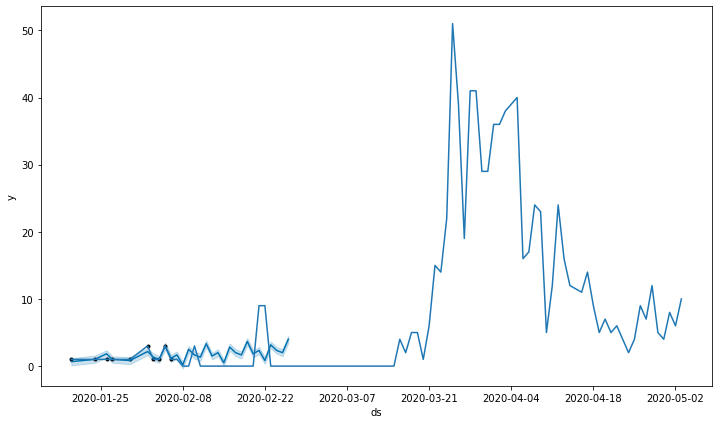

In [32]:
m_1 = Prophet()
m_1.fit(df_1)
future_1 = m_1.make_future_dataframe(periods=20)
forecast_1 = m_1.predict(future_1)
fig_1 = m_1.plot(forecast_1)
uni_data.plot(subplots=True)

In [90]:
m_2 = Prophet()
m_2.fit(df_2)
future_2 = m_2.make_future_dataframe(periods=20)
forecast_2 = m_2.predict(future_2)
fig_2 = m_2.plot(forecast_2)
uni_data.plot(subplots=True)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.


ValueError: view limit minimum -36797.3 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -36797.3 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 720x432 with 1 Axes>

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000281AAB3D808>],
      dtype=object)

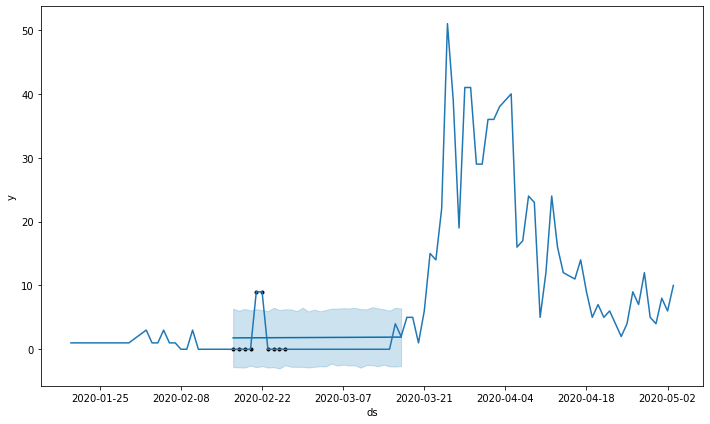

In [33]:
m_3 = Prophet()
m_3.fit(df_3)
future_3 = m_3.make_future_dataframe(periods=20)
forecast_3 = m_3.predict(future_3)
fig_3 = m_3.plot(forecast_3)
uni_data.plot(subplots=True)

In [ ]:
m_4 = Prophet()
m_4.fit(df_4)
future_4 = m_4.make_future_dataframe(periods=20)
forecast_4 = m_4.predict(future_4)
fig_4 = m_4.plot(forecast_4)
uni_data.plot(subplots=True)

In [ ]:
m_5 = Prophet()
m_5.fit(df_5)
future_5 = m_5.make_future_dataframe(periods=20)
forecast_5 = m_5.predict(future_5)
fig_5 = m_5.plot(forecast_5)
uni_data.plot(subplots=True)

In [ ]:
m_6 = Prophet()
m_6.fit(df_6)
future_6 = m_6.make_future_dataframe(periods=20)
forecast_6 = m_6.predict(future_6)
fig_6 = m_6.plot(forecast_6)
uni_data.plot(subplots=True)

# 10개씩 자르니 확연히 언더피팅된 모습을 볼 수 있다.

In [ ]:
df_1=df[:20]
df_2=df[20:40]
df_3=df[40:60]
df_4=df[60:80]
df_5=df[80:]

In [ ]:
m_1 = Prophet()
m_1.fit(df_1)
future_1 = m_1.make_future_dataframe(periods=20)
forecast_1 = m_1.predict(future_1)
fig_1 = m_1.plot(forecast_1)
uni_data.plot(subplots=True)

In [ ]:
m_2 = Prophet()
m_2.fit(df_2)
future_2 = m_2.make_future_dataframe(periods=20)
forecast_2 = m_2.predict(future_2)
fig_2 = m_2.plot(forecast_2)
uni_data.plot(subplots=True)

In [ ]:
m_3 = Prophet()
m_3.fit(df_3)
future_3 = m_3.make_future_dataframe(periods=20)
forecast_3 = m_3.predict(future_3)
fig_3 = m_3.plot(forecast_3)
uni_data.plot(subplots=True)

In [ ]:
m_4 = Prophet()
m_4.fit(df_4)
future_4 = m_4.make_future_dataframe(periods=20)
forecast_4 = m_4.predict(future_4)
fig_4 = m_4.plot(forecast_4)
uni_data.plot(subplots=True)


In [ ]:
m_5 = Prophet()
m_5.fit(df_5)
future_5 = m_5.make_future_dataframe(periods=20)
forecast_5 = m_5.predict(future_5)
fig_5 = m_5.plot(forecast_5)
uni_data.plot(subplots=True)

# 여전히 언더피팅이 보이므로 30개씩 슬라이싱

In [ ]:
df_1=df[:30]
df_2=df[30:60]
df_3=df[60:]

In [ ]:
m_1 = Prophet()
m_1.fit(df_1)
future_1 = m_1.make_future_dataframe(periods=20)
forecast_1 = m_1.predict(future_1)
fig_1 = m_1.plot(forecast_1)
uni_data.plot(subplots=True)

In [ ]:
m_2 = Prophet()
m_2.fit(df_2)
future_2 = m_2.make_future_dataframe(periods=20)
forecast_2 = m_2.predict(future_2)
fig_2 = m_2.plot(forecast_2)
uni_data.plot(subplots=True)

In [ ]:
m_3 = Prophet()
m_3.fit(df_3)
future_3 = m_3.make_future_dataframe(periods=20)
forecast_3 = m_3.predict(future_3)
fig_3 = m_3.plot(forecast_3)
uni_data.plot(subplots=True)

# 오버피팅이 보이므로 20~30 사이에 최적의 하이퍼파리미터가 있을거라 추측가능->애매

In [34]:
df_1=df[:25]
df_2=df[25:50]
df_3=df[50:75]
df_4=df[75:]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000281AB7E95C8>],
      dtype=object)

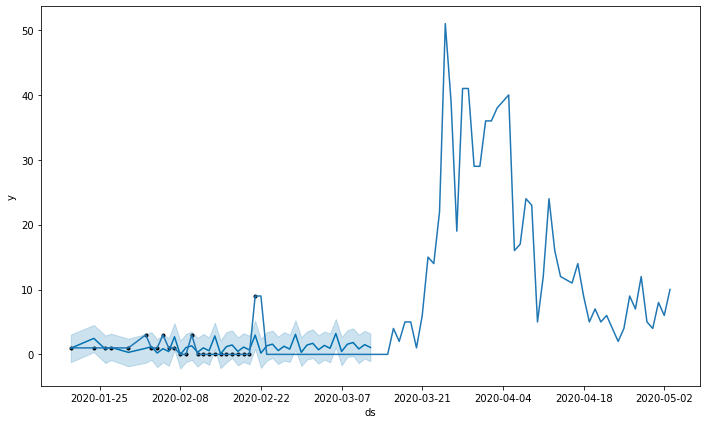

In [35]:
m_1 = Prophet()
m_1.fit(df_1)
future_1 = m_1.make_future_dataframe(periods=20)
forecast_1 = m_1.predict(future_1)
fig_1 = m_1.plot(forecast_1)
uni_data.plot(subplots=True)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000281AA7A49C8>],
      dtype=object)

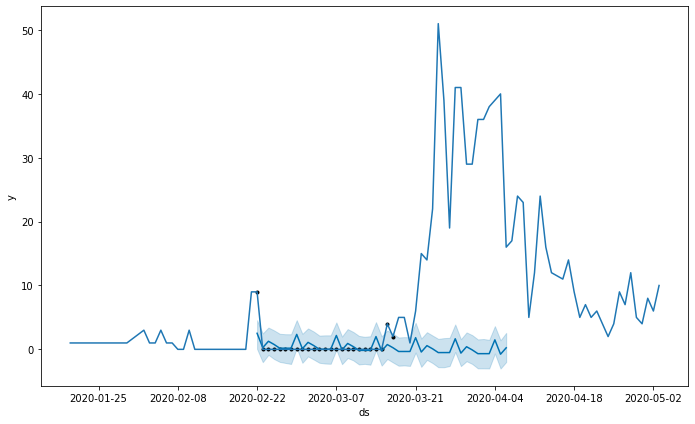

In [36]:
m_2 = Prophet()
m_2.fit(df_2)
future_2 = m_2.make_future_dataframe(periods=20)
forecast_2 = m_2.predict(future_2)
fig_2 = m_2.plot(forecast_2)
uni_data.plot(subplots=True)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000281AA782588>],
      dtype=object)

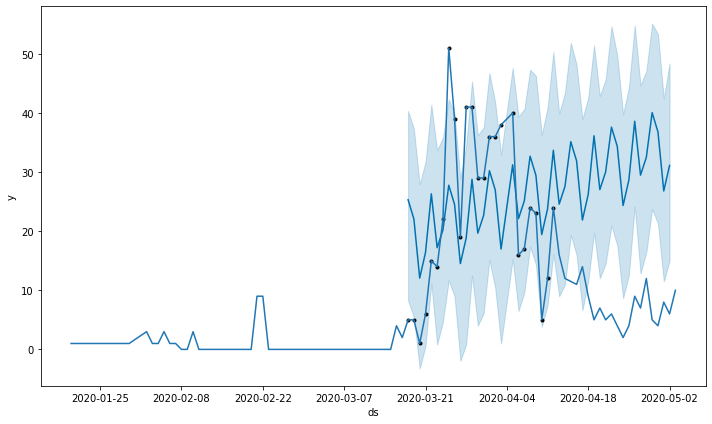

In [37]:
m_3 = Prophet()
m_3.fit(df_3)
future_3 = m_3.make_future_dataframe(periods=20)
forecast_3 = m_3.predict(future_3)
fig_3 = m_3.plot(forecast_3)
uni_data.plot(subplots=True)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000281AA47A4C8>],
      dtype=object)

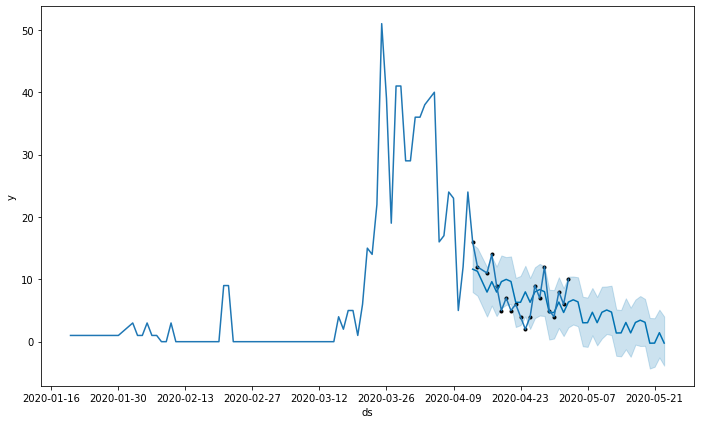

In [38]:
m_4 = Prophet()
m_4.fit(df_4)
future_4 = m_4.make_future_dataframe(periods=20)
forecast_4 = m_4.predict(future_4)
fig_4 = m_4.plot(forecast_4)
uni_data.plot(subplots=True)

# 25개로 슬라이싱 한것이 적절히 피팅되었다고 판단

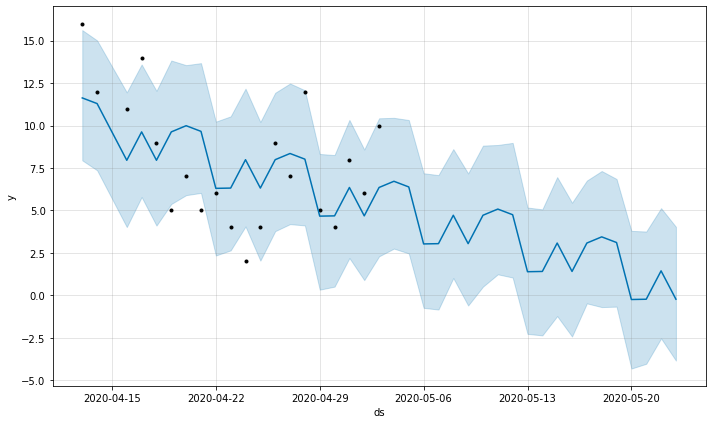

In [39]:
fig_4 = m_4.plot(forecast_4)

In [40]:
forecast_4

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-04-13,10.132323,7.950923,15.619033,10.132323,10.132323,1.494281,1.494281,1.494281,1.494281,1.494281,1.494281,0.0,0.0,0.0,11.626604
1,2020-04-14,9.898568,7.366116,15.012290,9.898568,9.898568,1.394629,1.394629,1.394629,1.394629,1.394629,1.394629,0.0,0.0,0.0,11.293197
2,2020-04-16,9.431058,4.022245,11.953250,9.431058,9.431058,-1.477435,-1.477435,-1.477435,-1.477435,-1.477435,-1.477435,0.0,0.0,0.0,7.953622
3,2020-04-17,9.197303,5.790684,13.595985,9.197303,9.197303,0.427485,0.427485,0.427485,0.427485,0.427485,0.427485,0.0,0.0,0.0,9.624787
4,2020-04-18,8.963547,4.107803,12.041061,8.963547,8.963547,-1.008548,-1.008548,-1.008548,-1.008548,-1.008548,-1.008548,0.0,0.0,0.0,7.955000
5,2020-04-19,8.729792,5.383270,13.828324,8.729792,8.729792,0.896372,0.896372,0.896372,0.896372,0.896372,0.896372,0.0,0.0,0.0,9.626164
6,2020-04-20,8.496037,5.900787,13.555850,8.496037,8.496037,1.494281,1.494281,1.494281,1.494281,1.494281,1.494281,0.0,0.0,0.0,9.990318
7,2020-04-21,8.262282,6.033488,13.674471,8.262282,8.262282,1.394629,1.394629,1.394629,1.394629,1.394629,1.394629,0.0,0.0,0.0,9.656911
8,2020-04-22,8.028527,2.347331,10.229503,8.028527,8.028527,-1.726784,-1.726784,-1.726784,-1.726784,-1.726784,-1.726784,0.0,0.0,0.0,6.301742
9,2020-04-23,7.794772,2.649336,10.541459,7.794772,7.794772,-1.477435,-1.477435,-1.477435,-1.477435,-1.477435,-1.477435,0.0,0.0,0.0,6.317336


In [41]:
from sklearn.metrics import mean_squared_error

In [93]:
forecast_4['yhat'][22:36]#5/06~5/19

22    3.029170
23    3.044764
24    4.715929
25    3.046141
26    4.717306
27    5.081459
28    4.748053
29    1.392884
30    1.408478
31    3.079643
32    1.409855
33    3.081020
34    3.445173
35    3.111767
Name: yhat, dtype: float64

In [92]:
y_pred=forecast_4['yhat'][20:25] #5/4~5/08 예측값
y_pred

20    6.717746
21    6.384339
22    3.029170
23    3.044764
24    4.715929
Name: yhat, dtype: float64

In [52]:
y_pred=forecast_4['yhat'][18:25]#5/2~5/08 예측값
y_pred
y_pred

18    4.682427
19    6.353592
20    6.717746
21    6.384339
22    3.029170
23    3.044764
24    4.715929
Name: yhat, dtype: float64

In [ ]:
y=patient_df_new['y'][95:]# 5/4~5/08 실제값
y

In [ ]:
patient_df_new['y'][85:]

In [ ]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
rmse = rmse(y_pred, y)
rmse

In [ ]:
(8-6.717746)**2+(3-6.384339)**2+(2-3.029170)**2+(3-3.044764)**2+(11-4.715929)**2

In [ ]:
np.sqrt(53.648668825074/5)#rmse=3.275627232304494

In [78]:
abc=df[67:92]
abc

,ds,y


In [79]:
m_1 = Prophet()
m_1.fit(abc)
future_1 = m_1.make_future_dataframe(periods=20)
forecast_1 = m_1.predict(future_1)
fig_1 = m_1.plot(forecast_1)
uni_data.plot(subplots=True)

ValueError: Dataframe has less than 2 non-NaN rows.

In [ ]:
forecast_1

In [ ]:
(8-7.181806)**2+(3-10.726148)**2+(2-7.18)**2+(3-3.044764)**2+(11-4.715929)**2
np.sqrt(53.648668825074/5)#rmse=3.275627232304494

In [ ]:
(6.318713-4)**2
+(7.989878-9)**2
+(8.354032-7)**2
+(8.020625-12)**2
+(4.665456-5)**2
+(4.681050-4)**2
+(6.352215-8)**2
+(4.682427-6)**2
+(6.353592-10)**2
+(6.717746-8)**2
+(6.384339-3)**2
+(3.029170-2)**2
+(3.044764-3)**2
+(4.715929-11)**2


In [ ]:
np.sqrt(39.489548333041/14)

In [ ]:
def score(n, y, y_hat):
    sum1 = np.sum((y - y_hat)**2)
    sum2 = np.sum(y**2)
    
    score = 100*(1-sum1/sum2)
    
    return score

In [ ]:
(6.353592-10)**2
+(6.717746-8)**2
+(6.384339-3)**2
+(3.029170-2)**2
+(3.044764-3)**2
+(4.715929-11)**2

In [ ]:
(6.3-10)**2
+(7-8)**2
+(6-3)**2
+(3-2)**2
+(3-3)**2
+(5-11)**2

In [ ]:
(3-10)**2
+(3-8)**2
+(0-3)**2
+(1-2)**2
+(1-3)**2
+(0-11)**2

In [ ]:
100*(1-(121/np.sum(10**2+8**2+3**2+2**2+3**2+11**2)))

In [ ]:
100*(1-(39.489548333041/np.sum(10**2+8**2+3**2+2**2+3**2+11**2)))

In [ ]:
100*(1-(36/np.sum(10**2+8**2+3**2+2**2+3**2+11**2)))

In [11]:
patient_df_new

,ds,y,ch,asia,europe,us,africa,austrailia,a
0,2020-01-20,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN
1,2020-01-24,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN
2,2020-01-26,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN
3,2020-01-27,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN
4,2020-01-30,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...
96,2020-05-05,3.0,0.0,1.0,1.0,1.0,0.0,0.0,86108.0
97,2020-05-06,2.0,0.0,2.0,0.0,0.0,0.0,0.0,81451.0
98,2020-05-07,3.0,0.0,1.0,0.0,2.0,0.0,0.0,71431.0
99,2020-05-08,11.0,0.0,8.0,0.0,3.0,0.0,0.0,83462.0


In [84]:
y=patient_df_new['y']# prophet에 넣기 위해 변경
ds=patient_df_new['ds']
df=pd.concat([ds,y],axis=1)

In [85]:
df=df[74:100]
df

,ds,y
74,2020-04-12,24.0
75,2020-04-13,16.0
76,2020-04-14,12.0
77,2020-04-16,11.0
78,2020-04-17,14.0
79,2020-04-18,9.0
80,2020-04-19,5.0
81,2020-04-20,7.0
82,2020-04-21,5.0
83,2020-04-22,6.0


In [88]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=20)
forecast = m.predict(future)
fig= m.plot(forecast)
uni_data.plot(subplots=True)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


ValueError: view limit minimum -36799.65 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -36799.65 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 720x432 with 1 Axes>

In [87]:
patient_df
y=patient_df['y']
ds=patient_df['ds']
df=pd.concat([ds,y],axis=1)[75:]
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=20)
forecast = m.predict(future)
fig= m.plot(forecast)
uni_data.plot(subplots=True)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


ValueError: view limit minimum -36799.65 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -36799.65 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 720x432 with 1 Axes>

In [ ]:
fig2 = m.plot_components(forecast)

# 피쳐 만들어보기

In [ ]:
roaming_df1.head()

In [ ]:
import glob
roaming_df1

allData=[]
allData.append(roaming_df1)
allData.append(roaming_df2)
allData.append(roaming_df3)

roaming_data= pd.concat(allData, axis=0, ignore_index=True) # concat함수를 이용해서 리스트의 내용을 병합
roaming_data.head()

In [ ]:
roaming_data

In [ ]:
f = open('C:/Users/장세환/Desktop/시계열/코로나_해외유입환자모델링/corona_contest_data_0406/Roaming_data1.csv', 'w')
f.write(roaming_data)

In [ ]:
roaming_data.groupby('iso').sum()['count']

In [ ]:
roaming_data.groupby('iso').sum()['count'].plot()

In [ ]:
iso=roaming_data.groupby('iso').sum()['count']
iso.plot()

In [ ]:
iso

In [ ]:
a=[]
for i in range(len(iso)):
    if iso[i]>300000:
        print([i])

In [ ]:
plt.pie(iso)

In [ ]:
roaming_data.groupby('iso').sum()


In [ ]:
#[32][75][124][150][166]
roaming_data['iso'][32]#아랍에미리트

In [ ]:
roaming_data['iso'][75]#오스트리아

In [ ]:
roaming_data['iso'][124]#호주

In [ ]:
roaming_data['iso'][150]#호주?

In [ ]:
roaming_data['iso'][168]#아제르바이잔

In [10]:
roaming_df2=pd.read_csv('C:/Users/장세환/Desktop/시계열/코로나_해외유입환자모델링/corona_contest_data_0406/2. Roaming_data2.csv')
roaming_df3=pd.read_csv('C:/Users/장세환/Desktop/시계열/코로나_해외유입환자모델링/corona_contest_data_0406/2. Roaming_data3.csv')


FileNotFoundError: [Errno 2] File C:/Users/장세환/Desktop/시계열/코로나_해외유입환자모델링/corona_contest_data_0406/2. Roaming_data2.csv does not exist: 'C:/Users/장세환/Desktop/시계열/코로나_해외유입환자모델링/corona_contest_data_0406/2. Roaming_data2.csv'

In [ ]:
allData2=[]

allData2.append(roaming_df2)
allData2.append(roaming_df3)

roaming_data2= pd.concat(allData2, axis=0, ignore_index=True) # concat함수를 이용해서 리스트의 내용을 병합
roaming_data2

# 우라나라 환자수

In [ ]:
Time_our.head()

In [ ]:
Time_our['confirmed'].plot()

In [ ]:
Time_our['test'].plot()

In [ ]:
Time_our['confirmed'].astype(float)
uni_data2 = Time_our['confirmed']
uni_data2.index = Time_our['date']
uni_data2.plot(subplots=True)

In [ ]:
uni_data[75:].plot(subplots=True)

In [ ]:
a=[]
for i in range(len(Time_our)):
    if i !=len(Time_our)-1:
        a=Time_our['confirmed'][i+1]-Time_our['confirmed'][i]
    else:
        break
a   

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000281AAC95888>],
      dtype=object)

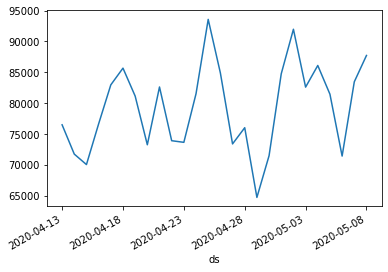

In [44]:
global1=pd.read_csv('C:/Users/장세환/Desktop/시계열/코로나_해외유입환자모델링/corona_contest_data_0406/global.csv')
global1['a'].astype(float)
uni_data3 = global1['a']
uni_data3.index = global1['ds']
uni_data3.plot(subplots=True)

In [45]:
#patient_df[75:] #5/03
glo=global1['a'][:20]
glo

ds
2020-04-13    76496.0
2020-04-14    71749.0
2020-04-15    70053.0
2020-04-16    76646.0
2020-04-17    82967.0
2020-04-18    85678.0
2020-04-19    81153.0
2020-04-20    73262.0
2020-04-21    82625.0
2020-04-22    73920.0
2020-04-23    73656.0
2020-04-24    81529.0
2020-04-25    93576.0
2020-04-26    84899.0
2020-04-27    73400.0
2020-04-28    76026.0
2020-04-29    64730.0
2020-04-30    71493.0
2020-05-01    84762.0
2020-05-02    91977.0
Name: a, dtype: float64

In [46]:
df =patient_df
df["add1"] = global1['a'][:20]
#for i in range(len(df)):
 #   df['add1'][i]=glo[i]
#df    

In [72]:
df=patient_df_new[75:100]
df
y=df['y']# prophet에 넣기 위해 변경
ds=df['ds']
df=pd.concat([ds,y],axis=1)

In [73]:
uni_data = df['y']

In [89]:
m = Prophet()
#m.add_regressor('a')
#m.add_regressor('ch')
#m.add_regressor('asia')
#m.add_regressor('europe')
#m.add_regressor('us')
#m.add_regressor('africa')
m.fit(df)
future = m.make_future_dataframe(periods=20)
forecast = m.predict(future)
fig= m.plot(forecast)
uni_data.plot(subplots=True)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


ValueError: view limit minimum -36799.65 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -36799.65 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 720x432 with 1 Axes>

In [ ]:
1

In [ ]:
forecast[18:25]['yhat']#5/02~5/08

In [ ]:
df['y']

In [53]:
y=[6,10,8,3,2,3]
yhat=[14.896610,6.563297,7.343839,5.844018,2.897321,3.344382,6.594421]
yhat_plus=[4.682427,6.353592,6.717746,6.384339,3.029170,3.044764,4.715929]


In [110]:
#반올림
#yhat_plus=[5,6,7,6,3,3,5]
yhat_plus=[15,7,7,6,3,3,7,3,3]

In [111]:
y=[6,10,8,3,2,3,11,1]]#5/02~5/08
a=[]
b=[]
for i in range(len(y)):
    a.append((y[i]-yhat_plus[i])**2)
for i in range(len(y)):
    b.append(y[i]**2)
100*(1-np.sum(a)/np.sum(b))    

64.82558139534885

# 모델평가

In [76]:
y=[6,10,8,3,2,3]
a=[]
b=[]
for i in range(len(y)):
    a.append((y[i]-yhat[i])**2)
for i in range(len(y)):
    b.append(y[i]**2)
100*(1-np.sum(a)/np.sum(b))    

54.773258295712154

In [ ]:
[3.029170,3.044764,4.715929,3.046141,4.717306,5.081459,4.748053,1.392884,1.408478,3.079643,1.409855,3.081020,3.445173,3.111767]#5/06~5/19 원본

In [94]:
forecast_4['yhat'][22:36]#5/06~5/19

22    3.029170
23    3.044764
24    4.715929
25    3.046141
26    4.717306
27    5.081459
28    4.748053
29    1.392884
30    1.408478
31    3.079643
32    1.409855
33    3.081020
34    3.445173
35    3.111767
Name: yhat, dtype: float64

In [ ]:
#5/06~5/19 반올림
y=[3,3,5,3,5,5,5,1,1,3,1,3,3,3]

In [107]:
p
y=p['y']# prophet에 넣기 위해 변경
ds=p['ds']
df=pd.concat([ds,y],axis=1)
df['ds']=pd.to_datetime(df['ds'])

In [109]:
m_new= Prophet()
m_new.fit(df)
future_new = m_new.make_future_dataframe(periods=20)
forecast_new = m_new.predict(future_new)
fig_new = m_new.plot(forecast_new)
uni_data.plot(subplots=True)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ValueError: view limit minimum -36799.950000000004 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -36799.950000000004 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 720x432 with 1 Axes>

In [41]:
patient_df510=pd.read_excel('C:/Users/장세환/Desktop/시계열/코로나_해외유입환자모델링/corona_contest_data_0406/corona_dataset_5010.xlsx') 

In [42]:
patient_df510[75:]

,ds,y,ch,asia,europe,us,africa,austrailia,global
75,2020-04-13,16,0,1,3,12,0,0,76496.0
76,2020-04-14,12,0,1,2,9,0,0,71749.0
77,2020-04-16,11,0,2,2,7,0,0,70053.0
78,2020-04-17,14,0,3,1,10,0,0,76646.0
79,2020-04-18,9,0,1,2,6,0,0,82967.0
80,2020-04-19,5,0,0,2,3,0,0,85678.0
81,2020-04-20,7,0,0,0,7,0,0,81153.0
82,2020-04-21,5,0,1,1,3,0,0,73262.0
83,2020-04-22,6,0,2,2,2,0,0,82625.0
84,2020-04-23,4,1,1,0,2,0,0,73920.0


In [43]:
y=patient_df510['y']# prophet에 넣기 위해 변경
ds=patient_df510['ds']
df=pd.concat([ds,y],axis=1)
df=df[75:]
df

,ds,y
75,2020-04-13,16
76,2020-04-14,12
77,2020-04-16,11
78,2020-04-17,14
79,2020-04-18,9
80,2020-04-19,5
81,2020-04-20,7
82,2020-04-21,5
83,2020-04-22,6
84,2020-04-23,4


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 20.


NameError: name 'uni_data' is not defined

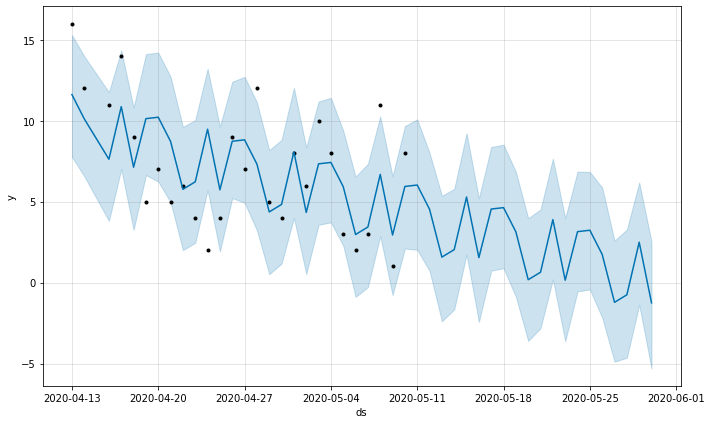

In [44]:
df['ds']=pd.to_datetime(df['ds'])
m_1 = Prophet()
m_1.fit(df)
future_1 = m_1.make_future_dataframe(periods=20)
forecast_1 = m_1.predict(future_1)
fig_1 = m_1.plot(forecast_1)
uni_data.plot(subplots=True)

In [45]:
 forecast_1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-04-13,9.834627,7.763093,15.297364,9.834627,9.834627,1.780172,1.780172,1.780172,1.780172,1.780172,1.780172,0.0,0.0,0.0,11.614799
1,2020-04-14,9.635146,6.571007,13.986656,9.635146,9.635146,0.482522,0.482522,0.482522,0.482522,0.482522,0.482522,0.0,0.0,0.0,10.117668
2,2020-04-16,9.236186,3.813013,11.768425,9.236186,9.236186,-1.612100,-1.612100,-1.612100,-1.612100,-1.612100,-1.612100,0.0,0.0,0.0,7.624086
3,2020-04-17,9.036705,7.020747,14.347679,9.036705,9.036705,1.837950,1.837950,1.837950,1.837950,1.837950,1.837950,0.0,0.0,0.0,10.874655
4,2020-04-18,8.837225,3.255021,10.807286,8.837225,8.837225,-1.707426,-1.707426,-1.707426,-1.707426,-1.707426,-1.707426,0.0,0.0,0.0,7.129799
5,2020-04-19,8.637744,6.640488,14.115148,8.637744,8.637744,1.493107,1.493107,1.493107,1.493107,1.493107,1.493107,0.0,0.0,0.0,10.130852
6,2020-04-20,8.438264,6.242536,14.213565,8.438264,8.438264,1.780172,1.780172,1.780172,1.780172,1.780172,1.780172,0.0,0.0,0.0,10.218436
7,2020-04-21,8.238783,4.970603,12.723241,8.238783,8.238783,0.482522,0.482522,0.482522,0.482522,0.482522,0.482522,0.0,0.0,0.0,8.721305
8,2020-04-22,8.039303,2.004778,9.617983,8.039303,8.039303,-2.274225,-2.274225,-2.274225,-2.274225,-2.274225,-2.274225,0.0,0.0,0.0,5.765078
9,2020-04-23,7.839823,2.464593,10.042803,7.839823,7.839823,-1.612100,-1.612100,-1.612100,-1.612100,-1.612100,-1.612100,0.0,0.0,0.0,6.227723


In [104]:
 forecast_1[25:]['yhat']#5/09~5/30

25    2.940710
26    5.941762
27    6.029347
28    4.532216
29    1.575988
30    2.038633
31    5.289202
32    1.544347
33    4.545399
34    4.632984
35    3.135853
36    0.179625
37    0.642270
38    3.892839
39    0.147984
40    3.149036
41    3.236621
42    1.739490
43   -1.216738
44   -0.754093
45    2.496476
46   -1.248379
Name: yhat, dtype: float64

In [107]:
yhat=[2.940710
,5.941762
,6.029347
,4.532216
,1.575988
,2.038633
,5.289202
,1.544347
,4.545399
,4.632984
,3.135853
,0.179625
,0.642270
,3.892839
,0.147984
,3.149036
,3.236621
,1.739490
,1.216738
,0.754093
,2.496476
,1.248379]#5/09~5/30
#len(yhat)

In [46]:
 forecast_1['yhat'][18:26]#5/02~5/09 18 25  2.368095

18    4.337073
19    7.338125
20    7.425710
21    5.928579
22    2.972351
23    3.434996
24    6.685565
25    2.940710
Name: yhat, dtype: float64

In [47]:
yhat=[ 4.337073,7.338125,7.425710,5.928579,2.972351,3.434996,6.685565,2.940710]

In [48]:
y=[6,10,8,3,2,3,11,1]#5/02~5/09
a=[]
b=[]
for i in range(len(y)):
    a.append((y[i]-yhat[i])**2)
for i in range(len(y)):
    b.append(y[i]**2)
100*(1-np.sum(a)/np.sum(b))    

87.71142984103577

# 다변량

In [59]:
patient_df510[75:]

,ds,y,ch,asia,europe,us,africa,austrailia,global
75,2020-04-13,16,0,1,3,12,0,0,76496.0
76,2020-04-14,12,0,1,2,9,0,0,71749.0
77,2020-04-16,11,0,2,2,7,0,0,70053.0
78,2020-04-17,14,0,3,1,10,0,0,76646.0
79,2020-04-18,9,0,1,2,6,0,0,82967.0
80,2020-04-19,5,0,0,2,3,0,0,85678.0
81,2020-04-20,7,0,0,0,7,0,0,81153.0
82,2020-04-21,5,0,1,1,3,0,0,73262.0
83,2020-04-22,6,0,2,2,2,0,0,82625.0
84,2020-04-23,4,1,1,0,2,0,0,73920.0


In [61]:
y=patient_df510['y']# prophet에 넣기 위해 변경
ds=patient_df510['ds']
df=pd.concat([ds,y],axis=1)
df=df[75:]
df

,ds,y
75,2020-04-13,16
76,2020-04-14,12
77,2020-04-16,11
78,2020-04-17,14
79,2020-04-18,9
80,2020-04-19,5
81,2020-04-20,7
82,2020-04-21,5
83,2020-04-22,6
84,2020-04-23,4


In [56]:
df['ds']=pd.to_datetime(df['ds'])

m_1 = Prophet()
m_1.add_regressor('global')
m_1.fit(df)
future_1 = m_1.make_future_dataframe(periods=20)
forecast_1 = m_1.predict(future_1)
fig_1 = m_1.plot(forecast_1)
uni_data.plot(subplots=True)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 20.


ValueError: Regressor 'global' missing from dataframe

In [112]:
patient_df_200508=pd.read_csv('C:/Users/장세환/Desktop/시계열/코로나_해외유입환자모델링/corona_contest_data_0406/patient_df_200508.csv') 
patient_df_200508[75:]

,index,ds,y,14_ago,before_sum,before_mean,before_std,day_cat_d1,day_cat_d2,day_cat_d3,day_cat_d4,day_cat_d5,day_cat_d6,day_cat_d7,day_cat_d8
75,75,2020-04-13,16.000000,29,454,32.428571,10.631696,0,0,0,0,0,1,0,0
76,76,2020-04-14,12.000000,29,454,32.428571,10.631696,0,0,0,0,0,1,0,0
77,77,2020-04-16,11.000000,36,454,32.428571,10.631696,0,0,0,0,0,1,0,0
78,78,2020-04-17,14.000000,36,454,32.428571,10.631696,0,0,0,0,0,1,0,0
79,79,2020-04-18,9.000000,38,454,32.428571,10.631696,0,0,0,0,0,1,0,0
80,80,2020-04-19,5.000000,40,454,32.428571,10.631696,0,0,0,0,0,1,0,0
81,81,2020-04-20,7.000000,16,454,32.428571,10.631696,0,0,0,0,0,1,0,0
82,82,2020-04-21,5.000000,17,454,32.428571,10.631696,0,0,0,0,0,1,0,0
83,83,2020-04-22,6.000000,24,454,32.428571,10.631696,0,0,0,0,0,1,0,0
84,84,2020-04-23,4.000000,23,173,12.357143,7.044989,0,0,0,0,0,0,1,0


In [113]:
1

1

In [130]:
y=patient_df_200508['y']# prophet에 넣기 위해 변경
ds=patient_df_200508['ds']
ago=patient_df_200508['14_ago']
df=pd.concat([ds,y],axis=1)
df=pd.concat([df,ago],axis=1)
df=df[75:]
df

KeyError: 'y'

In [70]:
df['ds']=pd.to_datetime(df['ds'])

m_1 = Prophet()
m_1.add_regressor('14_ago')
m_1.fit(df)
future_1 = m_1.make_future_dataframe(periods=15)
forecast_1 = m_1.predict(future_1)
fig_1 = m_1.plot(forecast_1)
uni_data.plot(subplots=True)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ValueError: Regressor '14_ago' missing from dataframe

In [86]:
#help(Prophet.add_regressor)

In [72]:
from sklearn.neural_network import MLPRegressor

In [114]:
y=patient_df_200508['y'][75:]
del patient_df_200508['y']
del patient_df_200508['ds']

In [129]:
x=patient_df_200508[75:]

In [118]:
reg = MLPRegressor(hidden_layer_sizes=(10,),  activation='relu', solver='adam',    alpha=0.001,batch_size='auto',
                  learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True,
                  random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9,
                  nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
                  epsilon=1e-08)

reg = reg.fit(x, y)

In [119]:
reg.predict(x)#93 `99 110

array([20.64744784, 20.54347705, 20.12712775, 20.02315696, 19.82993516,
       19.63671337, 20.60375465, 20.45515836, 20.03880905,  7.4039048 ,
       10.57595929,  9.50237318,  7.57965895,  9.0534572 ,  9.84795295,
       10.13297184,  9.73868822, 10.7030096 , 11.49750536, 11.27304736,
       11.72789187, 11.6732595 , 11.26445005,  5.24780986,  5.05458807,
        4.72748976,  4.71276998,  4.38567168,  4.59407941,  4.53473413,
        4.25226133,  4.23754154,  3.95506874,  3.94034896,  4.05950569,
        4.0001604 ])

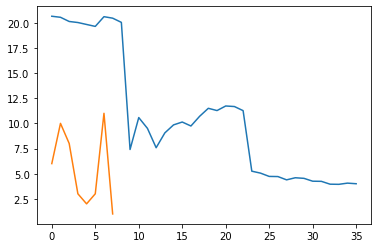

In [128]:
plt.plot(list(reg.predict(x)))
plt.plot(y)

In [131]:
#yhat=[11.497505355424012,
# 11.273047364662103,
# 11.727891870971055,
# 11.673259504476851,
# 11.264450045001729,
# 5.2478098596304905,
# 5.054588065640771, 4.72748976262841]
yhat=[5.24780986,  5.05458807,
        4.72748976,  4.71276998,  4.38567168,  4.59407941,  4.53473413,
        4.25226133]
y=[6,10,8,3,2,3,11,1]#5/02~5/09
a=[]
b=[]
for i in range(len(y)):
    a.append((y[i]-yhat[i])**2)
for i in range(len(y)):
    b.append(y[i]**2)
100*(1-np.sum(a)/np.sum(b)) 

71.14093648315878

# mlpreg, prophet스태킹

In [134]:
yhat1=[ 4.337073,7.338125,7.425710,5.928579,2.972351,3.434996,6.685565,2.940710]
yhat2=[5.24780986,  5.05458807,
        4.72748976,  4.71276998,  4.38567168,  4.59407941,  4.53473413,
        4.25226133]
yhat3=[]
for i in range(len(yhat1)):
    yhat3.append((yhat1[i]+yhat2[i])/2)
yhat3  

[4.79244143,
 6.196356535,
 6.07659988,
 5.32067449,
 3.6790113399999997,
 4.014537705,
 5.610149565,
 3.596485665]

In [135]:
y=[6,10,8,3,2,3,11,1]#5/02~5/09
a=[]
b=[]
for i in range(len(y)):
    a.append((y[i]-yhat3[i])**2)
for i in range(len(y)):
    b.append(y[i]**2)
100*(1-np.sum(a)/np.sum(b)) 

81.20596198432969

# mlpregressor반올림

In [136]:
yhat=[5,  5,
        5,  5,  4,  5,  5,
        4]
y=[6,10,8,3,2,3,11,1]#5/02~5/09
a=[]
b=[]
for i in range(len(y)):
    a.append((y[i]-yhat[i])**2)
for i in range(len(y)):
    b.append(y[i]**2)
100*(1-np.sum(a)/np.sum(b)) 

73.25581395348837

# mlp,prophet 스태킹 반올림

In [138]:
yhat1=[ 4.337073,7.338125,7.425710,5.928579,2.972351,3.434996,6.685565,2.940710]
yhat2=[5.24780986,  5.05458807,
        4.72748976,  4.71276998,  4.38567168,  4.59407941,  4.53473413,
        4.25226133]
yhat3=[]
for i in range(len(yhat1)):
    yhat3.append((yhat1[i]+yhat2[i])/2)
yhat3 

[4.62390493,
 6.027294035000001,
 5.8637448800000005,
 5.3563849900000005,
 3.69283584,
 3.797039705,
 5.767367065,
 3.626130665]

In [139]:
yhat3 =[5,6,6,5,4,4,6,4]
y=[6,10,8,3,2,3,11,1]#5/02~5/09
a=[]
b=[]
for i in range(len(y)):
    a.append((y[i]-yhat3[i])**2)
for i in range(len(y)):
    b.append(y[i]**2)
100*(1-np.sum(a)/np.sum(b)) 

81.3953488372093